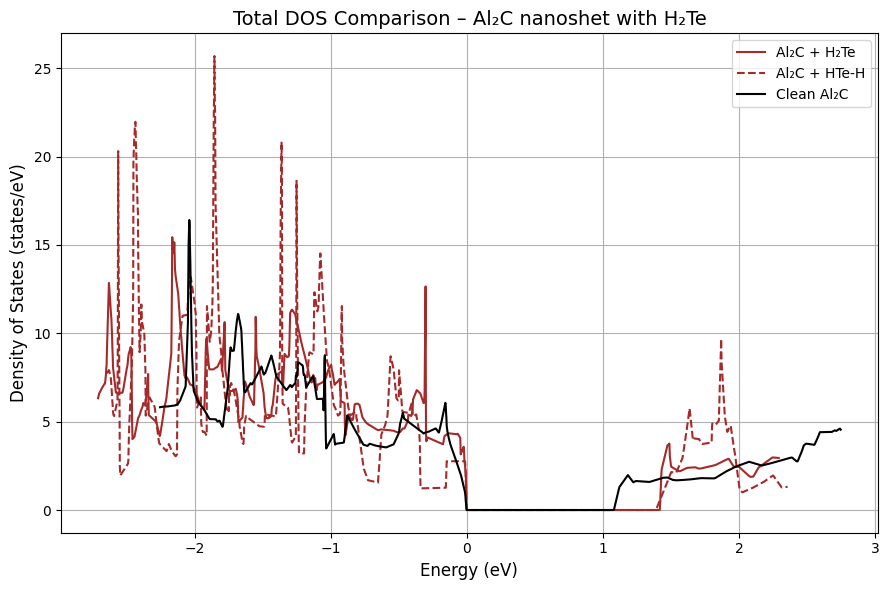

In [4]:
import matplotlib.pyplot as plt

# Function to read DOSCAR and extract energy and TDOS
def read_doscar(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    n_dos = int(lines[5].split()[2])             # number of DOS points
    fermi_energy = float(lines[5].split()[3])    # Fermi level

    energies = []
    dos_total = []

    data_lines = lines[6:6 + n_dos]
    for line in data_lines:                      # loop through each line of DOS data    
        parts = line.split()        
        energy = float(parts[0]) - fermi_energy  # energy relative to Fermi level
        dos = float(parts[1])                    # total DOS (spin up)
        energies.append(energy)
        dos_total.append(dos)

    return energies, dos_total # returns the two lists, so they can be used for plotting

# Function that estimate the band gap from DOS: look for where DOS is ~0 around the Fermi level
def estimate_band_gap(energies, dos, threshold=0.01):
    inside_gap = [e for e, d in zip(energies, dos) if abs(d) < threshold]
    if not inside_gap:
        return 0
    gap_min = min(inside_gap)
    gap_max = max(inside_gap)
    return gap_max - gap_min, gap_min, gap_max


# Load TDOS from the three DOSCAR files
energies1, dos1 = read_doscar("DOSCAR_H2Te")
energies2, dos2 = read_doscar("DOSCAR_HTe-H")
energies3, dos3 = read_doscar("DOSCAR_Al2C")

# Calculate the band gap
band_gap, gap_start, gap_end = estimate_band_gap(energies1, dos1)

# Plotting
plt.figure(figsize=(9, 6))

plt.plot(energies1, dos1, color='brown', label='Al₂C + H₂Te')
plt.plot(energies2, dos2, color='brown', linestyle='--', label='Al₂C + HTe-H')
plt.plot(energies3, dos3, color='black', label='Clean Al₂C')

# Labels and formatting
plt.xlabel('Energy (eV)', fontsize=12)
plt.ylabel('Density of States (states/eV)', fontsize=12)
plt.title('Total DOS Comparison – Al₂C nanoshet with H₂Te', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
